## Mini Project 2

Import required libraries

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import wordpunct_tokenize
from datetime import timedelta
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Load given datasets

In [470]:
!wget https://www.dropbox.com/s/l3enw3hgjb4zzpp/Consumer_Complaints_train.csv
!wget https://www.dropbox.com/s/llnxj1ozg4wmz23/Consumer_Complaints_test.csv

--2022-08-13 09:34:47--  https://www.dropbox.com/s/l3enw3hgjb4zzpp/Consumer_Complaints_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l3enw3hgjb4zzpp/Consumer_Complaints_train.csv [following]
--2022-08-13 09:34:47--  https://www.dropbox.com/s/raw/l3enw3hgjb4zzpp/Consumer_Complaints_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc058cd99a7f86380f1f4541c56d.dl.dropboxusercontent.com/cd/0/inline/Bq5ltnhWq4lgyVqqA1uo-zQvhB8X28_faB7vl9_iPzZcFua-M16RIExOlBF6F2E9zMkR-nk6cxH9wObqiApyaVTdVIcxcrKmiGJ_dPWhAstLGS5Iui4svzEryNtbUbHVfeX5968r8jiaUJlI90mg_HC19E5ULW62zZpGbrcHfSim-A/file# [following]
--2022-08-13 09:34:47--  https://uc058cd99a7f86380f1f4541c56d.dl.dropboxusercontent.com/cd/0/inline/Bq5ltnhWq4lgyVqqA

Print top 5 records of train dataset

In [471]:
train_data=pd.read_csv("Consumer_Complaints_train.csv")
train_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [472]:
test_data=pd.read_csv("Consumer_Complaints_test.csv")
test_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [473]:
from pandas._libs.lib import tuples_to_object_array
print(train_data.shape,test_data.shape)

(358810, 18) (119606, 17)


Print columns of train and test datasets

In [474]:
print(train_data.columns)
print(test_data.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [475]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

Print missing values in percentage

In [476]:
percent_missing_tr= train_data.isnull().sum() * 100 / len(train_data)
missing_value_df_tr = pd.DataFrame({'column_name': train_data.columns,
                                 'percent_missing': percent_missing_tr})
percent_missing_test = test_data.isnull().sum() * 100 / len(test_data)
missing_value_df_ts = pd.DataFrame({'column_name': test_data.columns,
                                 'percent_missing': percent_missing_test})
print("train missing")
print(missing_value_df_tr)
print("\n\ntest missing")
print(missing_value_df_ts)

train missing
                                               column_name  percent_missing
Date received                                Date received         0.000000
Product                                            Product         0.000000
Sub-product                                    Sub-product        28.925058
Issue                                                Issue         0.000000
Sub-issue                                        Sub-issue        61.139322
Consumer complaint narrative  Consumer complaint narrative        84.342688
Company public response            Company public response        81.067696
Company                                            Company         0.000000
State                                                State         0.809063
ZIP code                                          ZIP code         0.811293
Tags                                                  Tags        86.002062
Consumer consent provided?      Consumer consent provided?        71.68975

Drop columns where more than 25% of the data are missing.

In [477]:
# Below code gives percentage of null in every column
null_percentage2 = train_data.isnull().sum()/train_data.shape[0]*100

# Below code gives list of columns having more than 25% null
col_to_drop = null_percentage2[null_percentage2>25].keys()

train_data = train_data.drop(col_to_drop, axis=1)
train_data

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [478]:
# Below code gives percentage of null in every column
null_percentage1 = test_data.isnull().sum()/test_data.shape[0]*100

# Below code gives list of columns having more than 25% null
col_to_drop = null_percentage1[null_percentage1>25].keys()
test_data = test_data.drop(col_to_drop, axis=1)
test_data

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [479]:
train_data['Date received']= pd.to_datetime(train_data['Date received'])
test_data['Date received']= pd.to_datetime(test_data['Date received'])

In [480]:
from datetime import datetime
ls1=[]
ls2=[]
ls3=[]
for i in train_data['Date received']:
  x = datetime.date(i)
  ls1.append(x.month)
  ls2.append(x.day)
  ls3.append(x.year)
mn=pd.Series(ls1)
dy=pd.Series(ls2)
yr=pd.Series(ls3)
train_data["Month"]=mn
train_data["Day"]=dy
train_data["Year"]=yr

In [481]:
ls1=[]
ls2=[]
ls3=[]
for i in test_data['Date received']:
  x = datetime.date(i)
  ls1.append(x.month)
  ls2.append(x.day)
  ls3.append(x.year)
mn=pd.Series(ls1)
dy=pd.Series(ls2)
yr=pd.Series(ls3)
test_data["Month"]=mn
test_data["Day"]=dy
test_data["Year"]=yr

In [482]:
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Month,Day,Year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,10,14,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,4,26,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,12,20,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,1,30,2015


In [483]:
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Month,Day,Year
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,1,17,2015
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,6,22,2016
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,9,4,2015
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,5,17,2016
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016


Convert dates from object type to datetime type

In [484]:
train_data['Date received']= pd.to_datetime(train_data['Date received'])
test_data['Date received']= pd.to_datetime(test_data['Date received'])
train_data['Date sent to company']= pd.to_datetime(train_data['Date sent to company'])
test_data['Date sent to company']= pd.to_datetime(test_data['Date sent to company'])

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [485]:
train_data["Days held"]=train_data["Date sent to company"]-train_data["Date received"]
test_data["Days held"]=test_data["Date sent to company"]-test_data["Date received"]

Convert "Days Held" to Int(above column)

In [486]:
train_data["Days held"].astype("int")
test_data["Days held"].astype("int")

0                       0
1                       0
2                       0
3         259200000000000
4                       0
               ...       
119601                  0
119602     86400000000000
119603                  0
119604                  0
119605                  0
Name: Days held, Length: 119606, dtype: int64

In [487]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype          
---  ------                        --------------   -----          
 0   Date received                 358810 non-null  datetime64[ns] 
 1   Product                       358810 non-null  object         
 2   Issue                         358810 non-null  object         
 3   Company                       358810 non-null  object         
 4   State                         355907 non-null  object         
 5   ZIP code                      355899 non-null  object         
 6   Submitted via                 358810 non-null  object         
 7   Date sent to company          358810 non-null  datetime64[ns] 
 8   Company response to consumer  358810 non-null  object         
 9   Timely response?              358810 non-null  object         
 10  Consumer disputed?            358810 non-null  object         
 11  

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [488]:
train_data=train_data.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"])
test_data=test_data.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"])

In [489]:
test_data

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month,Day,Year,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,17,2015,0 days
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,22,2016,0 days
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,4,2015,0 days
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,17,2016,3 days
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0 days
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2,9,2015,0 days
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,11,13,2012,1 days
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,5,15,2012,0 days
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,6,7,2015,0 days


Impute null values in "State" by Mode 
(find mode and replace nan value)

In [490]:
train_data.State.mode()

0    CA
dtype: object

In [491]:
train_data.State.fillna("CA",inplace=True)
test_data.State.fillna("CA",inplace=True)

Check Missing Values in the dataset

In [492]:
train_data.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Month                           0
Day                             0
Year                            0
Days held                       0
dtype: int64

Categorize Days into Weeks with the help of 'Days Received'

In [493]:
def Week(ch):
  if(ch>28):
    return 5
  elif(ch>21):
    return 4
  elif(ch>14):
    return 3
  elif(ch>7):
    return 2
  else:
    return 1


In [494]:
train_data['week']=train_data.apply(lambda x:Week(x['Day']),axis=1)
test_data['week']=test_data.apply(lambda x:Week(x['Day']),axis=1)

Drop "Day_Received" column

In [495]:
train_data=train_data.drop(columns="Day")
test_data=test_data.drop(columns="Day")

Print head of train and test dataset and observe

In [496]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Year,Days held,week
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,0 days,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0 days,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,14 days,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,1 days,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0 days,5


In [497]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month,Year,Days held,week
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,0 days,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,0 days,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,0 days,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,3 days,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,0 days,1


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [498]:
disputed_cons=train_data[train_data["Consumer disputed?"]=="Yes"]

In [499]:
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Year,Days held,week
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0 days,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0 days,5
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,1,2014,5 days,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,12,2015,0 days,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,4,2012,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,CA,Postal mail,Closed with explanation,Yes,Yes,5,2014,5 days,5
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,Yes,8,2013,1 days,2
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,Yes,6,2016,0 days,3
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,Yes,2,2013,0 days,4


Plot bar graph for the total no of disputes with the help of seaborn

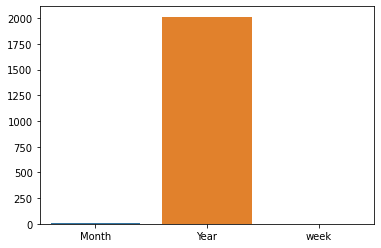

In [500]:
sns.barplot(data=disputed_cons)

Plot bar graph for the total no of disputes products-wise with help of seaborn

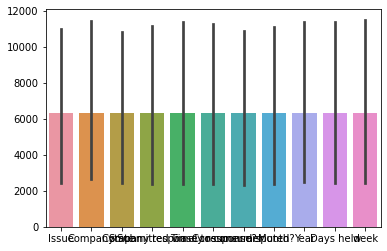

In [501]:
sns.barplot(data=disputed_cons.groupby("Product").count())

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

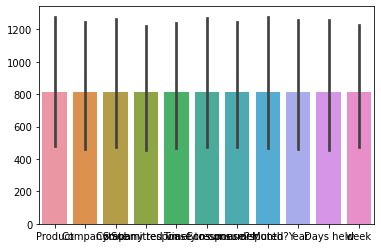

In [502]:
sns.barplot(data=disputed_cons.groupby("Issue").count())

Plot bar graph for the total no of disputes by State with Maximum Disputes

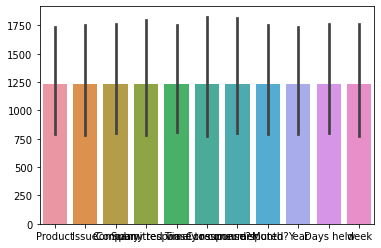

In [503]:
sns.barplot(data=disputed_cons.groupby("State").count())

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

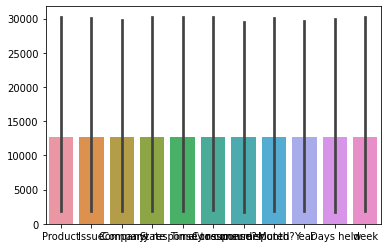

In [504]:
sns.barplot(data=disputed_cons.groupby("Submitted via").count())

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

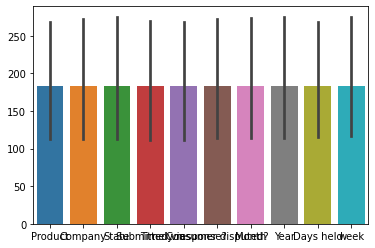

In [505]:
sns.barplot(data=disputed_cons.groupby(["Issue","Company response to consumer"]).count())

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

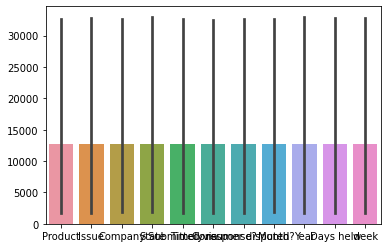

In [506]:
sns.barplot(data=disputed_cons.groupby("Company response to consumer").count())

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

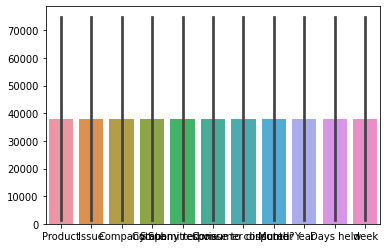

In [507]:
sns.barplot(data=disputed_cons.groupby("Timely response?").count())

Plot bar graph for the total no of disputes over Year Wise Complaints

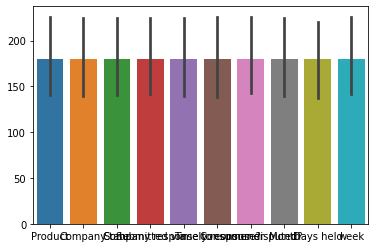

In [508]:
sns.barplot(data=disputed_cons.groupby(["Issue","Year"]).count())

Plot bar graph for the total no of disputes over Year Wise Disputes

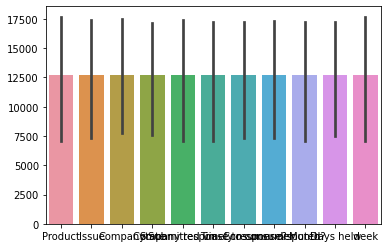

In [509]:
sns.barplot(data=disputed_cons.groupby("Year").count())

Plot  bar graph for the top companies with highest complaints

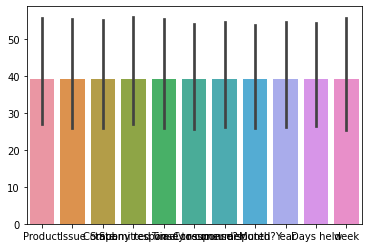

In [510]:
sns.barplot(data=disputed_cons.groupby("Company").count())

"Days Held" Column Analysis(describe)

In [511]:
train_data["Days held"].describe()

count                        358810
mean      4 days 10:57:07.690421114
std      16 days 17:48:00.827311545
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 4 days 00:00:00
max               993 days 00:00:00
Name: Days held, dtype: object

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [512]:
def days_held(ch):
  if ch>timedelta(days=0, hours=0, minutes=0, seconds=0, microseconds=0):
    return ch
  else:
    return timedelta(days=0, hours=0, minutes=0, seconds=0, microseconds=0)

train_data['Days held']=train_data.apply(lambda x:days_held(x['Days held']),axis=1)
test_data['Days held']=test_data.apply(lambda x:days_held(x['Days held']),axis=1)

Drop Days Held with Negative Values

In [513]:
train_data.drop(train_data[train_data['Days held'] ==timedelta(days=0, hours=0, minutes=0, seconds=0, microseconds=0)].index, inplace = True)
test_data.drop(test_data[test_data['Days held'] ==timedelta(days=0, hours=0, minutes=0, seconds=0, microseconds=0)].index, inplace = True)

In [514]:

print(train_data.shape,test_data.shape)

(197521, 12) (65627, 11)


Text pre-processing

In [515]:
relevant_text_train = train_data['Issue']
relevant_text_test = test_data['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [516]:
print(clean_data_train.shape,clean_data_test.shape)

(197521,) (65627,)


In [517]:
train_data['Issues_cleaned'] = clean_data_train
test_data['Issues_cleaned'] = clean_data_test
df_train = train_data.drop('Issue', axis = 1)
df_test = test_data.drop('Issue', axis = 1)

In [518]:
print(df_train.shape,df_test.shape)

(197521, 12) (65627, 11)


In [519]:
df_test.head()

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Month,Year,Days held,week,Issues_cleaned
3,Consumer Loan,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,3 days,3,loan servic payment escrow account
5,Mortgage,JPMorgan Chase & Co.,MI,Web,Closed without relief,Yes,1,2012,1 days,2,commun tactic
7,Credit reporting,"TransUnion Intermediate Holdings, Inc.",FL,Postal mail,Closed with explanation,Yes,6,2013,3 days,4,loan servic payment escrow account
8,Mortgage,Citibank,CA,Web,Closed with explanation,Yes,7,2014,6 days,3,cont d attempt collect debt not owe
10,Bank account or service,Wells Fargo & Company,NC,Postal mail,Closed with explanation,Yes,6,2015,1 days,1,late fee


Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [520]:
df_train=df_train.drop(columns=['Company','State','Year','Days held'])
df_test=df_test.drop(columns=['Company','State','Year','Days held'])

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [521]:
def change(ch):
  if ch=="Yes":
    return 1
  else:
    return 0
df_train['Consumer disputed?']=df_train.apply(lambda x:change(x["Consumer disputed?"]),axis=1)

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [522]:
d2=pd.get_dummies(df_train['Product'])
d3=pd.get_dummies(df_train[ 'Submitted via'])
d4=pd.get_dummies(df_train['Company response to consumer'])
d5=pd.get_dummies(df_train["Timely response?"])
d6=pd.get_dummies(df_test['Product'])
d7=pd.get_dummies(df_test[ 'Submitted via'])
d8=pd.get_dummies(df_test['Company response to consumer'])
d9=pd.get_dummies(df_test["Timely response?"])

Concate Dummy Variables and Drop the Original Columns

In [523]:
df_train=pd.concat([df_train,d2,d3,d4,d5],axis =1)
df_test=pd.concat([df_test,d6,d7,d8,d9],axis=1)

In [524]:
df_train=df_train.drop(columns=['Product','Submitted via','Company response to consumer',"Timely response?"])
df_test=df_test.drop(columns=['Product','Submitted via','Company response to consumer',"Timely response?"])

In [525]:
print(df_train.shape,df_test.shape)

(197521, 30) (65627, 29)


In [526]:
df_train.Issues_cleaned.mode(dropna=True)

0    loan modif collect foreclosur
dtype: object

In [527]:
df_train.fillna("loan modif collect foreclosur",inplace=True)
df_test.fillna("loan modif collect foreclosur",inplace=True)

In [528]:
print(df_train.shape,df_test.shape)

(197521, 30) (65627, 29)


Calculating TF-IDF

In [529]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
damag,11.398611
destroy,11.398611
conveni,10.482320
repossess,10.482320
sell,10.482320


In [530]:
print(df_train.shape,df_test.shape)

(197521, 30) (65627, 29)


Replacing Issues_cleaned by Vectorized Issues

In [531]:
df_train

,Consumer disputed?,Month,week,Issues_cleaned,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
2,0,12,3,apr or interest rate,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,3,1,cont d attempt collect debt not owe,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
5,1,1,2,commun tactic,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
9,0,8,2,applic origin mortgag broker,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
11,0,11,2,loan modif collect foreclosur,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358802,0,11,4,loan modif collect foreclosur,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
358804,0,4,3,loan modif collect foreclosur,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
358806,0,3,2,loan modif collect foreclosur,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
358808,0,6,4,loan modif collect foreclosur,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [532]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 95269
df_test['Feature168'] = Feature168

In [533]:
print(df_train.shape,df_test.shape)

(286241, 197) (95269, 192)


observe train and test datasets

In [534]:
df_train.head()
#df_test.head()

,Consumer disputed?,Month,week,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,12.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [535]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [536]:
df_train=df_train.drop(columns=['Feature164', 'Feature165', 'Feature166', 'Feature167'])

In [537]:
df_test.shape

(35985, 192)

Observe Shape of new Train and Test Datasets

In [538]:
df_train.shape
#df_test.shape

(108801, 193)

Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [539]:
X_train=df_train.drop(columns="Consumer disputed?")
y_train=df_train["Consumer disputed?"]
X_test=df_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [540]:
X_train.shape

(108801, 192)

Do feature selection with help of PCA

In [541]:
pca = PCA()
# Determine transformed features
pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [542]:
X_train_pca=pd.DataFrame(X_train_pca,columns=df_train.drop(columns="Consumer disputed?").columns)
X_test=pd.DataFrame(X_test,columns=df_test.columns)

In [543]:
print(X_train_pca.shape)

(108801, 192)


In [544]:
np.round(pca.explained_variance_ratio_,2)

array([0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [545]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [546]:
pca = PCA(n_components=60)
train_pca = pca.fit_transform(X_train_pca)
train_pca.shape

(108801, 60)

In [547]:
np.sum(pca.explained_variance_ratio_)

0.7974304308504807

In [548]:
pca = PCA(n_components=60)
test_pca = pca.fit_transform(X_test_pca)
test_pca.shape

(35985, 60)

In [549]:
np.sum(pca.explained_variance_ratio_)

0.8099017030712267

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [550]:
X_train=X_train_pca
X_test=test_pca

Shapes of the datasets

In [551]:
X_train.shape, y_train.shape, X_test.shape

((108801, 192), (108801,), (35985, 60))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [552]:
import warnings
warnings.filterwarnings("ignore")
clf = LogisticRegression(random_state=30)
clf = LogisticRegression(random_state=30).fit(X_train, y_train)
clf.score(X_train, y_train)


0.8007187433939026

In [553]:
clf1 = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
clf1.score(X_train, y_train)


0.8513892335548386

In [554]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
clf2.score(X_train, y_train)


0.8006911701179217

In [555]:
clf3 = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
clf3.score(X_train, y_train)


0.8007463166698835

In [556]:
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf4.score(X_train, y_train)


0.8010312405216864

In [557]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
neigh.score(X_train, y_train)


0.7888622347221074

In [558]:
xgb_clf = XGBClassifier(learning_rate=0.25, n_estimators=100).fit(X_train,y_train)
xgb_clf.score(X_train, y_train)

0.8014724129373811

Final Model and Prediction for test data file

In [559]:
clf1 = DecisionTreeClassifier(random_state=23).fit(X_train,y_train)
y_test=clf1.predict(df_test)

Export Predictions to CSV

In [560]:
df_test["Consumer disputed?"]=y_test

In [561]:
df_test.to_csv("/content/new_created.csv")